In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import LabelEncoder as le
from sklearn.metrics import confusion_matrix as cm,accuracy_score as acc , classification_report as cr
from sklearn.datasets import load_breast_cancer

In [41]:
daa=load_breast_cancer()
data=pd.DataFrame(daa.data,columns=daa.feature_names)
data['targat']=daa.target_names[daa.target]

In [43]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,targat
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [45]:
x=data.drop(columns='targat')
y=data['targat']
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [47]:
le=le()
#x['Gender']=le.fit_transform(x["Gender"])

In [49]:
xtrain,xtest,ytrain,ytest=tt(x,y,test_size=0.2,random_state=43)

In [51]:
from sklearn.tree import DecisionTreeClassifier as DT,plot_tree as TR

In [53]:
mod=DT()

In [55]:
mod.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [57]:
yprd=mod.predict(xtest)

In [59]:
print(type(ytest),type(yprd))

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


In [61]:
cm=cm(ytest,yprd)

In [63]:
ac=acc(ytest,yprd)
cr=cr(ytest,yprd)

In [65]:
print(ac,cr,cm)

0.9298245614035088               precision    recall  f1-score   support

      benign       0.97      0.92      0.95        75
   malignant       0.86      0.95      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114
 [[69  6]
 [ 2 37]]


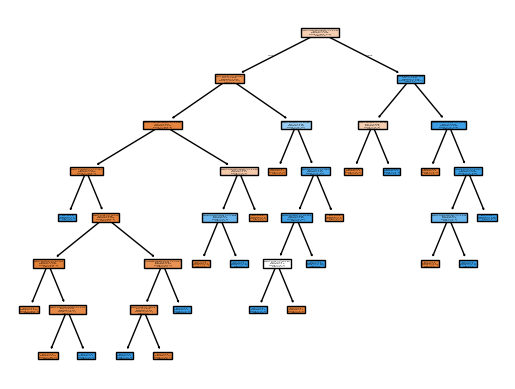

<Figure size 800x1000 with 0 Axes>

In [74]:
TR(mod,filled=True,feature_names=x.columns,class_names=['0','1'])
import matplotlib.pyplot as pt
pt.figure(figsize=(20,15))
pt.show()